## Surfinpy

#### Tutorial 6 - Temperature vs Pressure Including Vibrational Properties

In tutorial 5 we showed how SurfinPy can be used to calculate the vibrational entropy and zero point energy for solid phases and in tutorial 4 we showed how a temperature range can be used to calculate the phase diagram of temperature as a function of presure.  In this example we will use both lesson from these tutorials to produce a phase diagram of temperature as a function of pressure including the vibrational properties for solid phases.  Again this produces results which are easily compared to experimental values in addition to increasing the level of theory used.


In [1]:
from surfinpy import bulk_mu_vs_mu as bmvm
from surfinpy import utils as ut
from surfinpy import bulk_mu_vs_t as bmvt
from surfinpy import data
import numpy as np
from seaborn import palettes

import matplotlib.pyplot as plt
colors = ['#5B9BD5', '#4472C4', '#A5A5A5', '#772C24', '#ED7D31', '#FFC000', '#70AD47']

In [2]:
temperature_range = [273, 373]

In [3]:
bulk = data.ReferenceDataSet(cation = 1, anion = 1, energy = -92.0, funits = 10, file = 'ref_files/bulk_vib.yaml', entropy=True, zpe=True, temp_range=temperature_range)

In [4]:

Bulk = data.DataSet(cation = 10, x = 0, y = 0, energy = -92., color=colors[0],
                   label = "Bulk", entropy = True, zpe=True, file = 'ref_files/bulk_vib.yaml', 
                   funits = 10, temp_range=temperature_range)

D = data.DataSet(cation = 10, x = 10, y = 0, energy = -310.,  color=colors[1],
                   label = "D", entropy = True, zpe=True,  file = 'ref_files/D_vib.yaml', 
                   funits =  10, temp_range=temperature_range)

B = data.DataSet(cation = 10, x = 0, y = 10, energy = -228,  color=colors[2],
                   label = "B", entropy = True, zpe=True, file = 'ref_files/B_vib.yaml', 
                   funits =  10, temp_range=temperature_range)

F = data.DataSet(cation = 10, x = 8, y = 10, energy = -398.,  color=colors[3],
                   label = "F", entropy = True, zpe=True, file = 'ref_files/F_vib.yaml', 
                   funits =  2, temp_range=temperature_range)     
              
A = data.DataSet(cation = 10, x = 5, y = 20, energy = -468.,  color=colors[4],
                   label = "A", entropy = True, zpe=True, file = 'ref_files/A_vib.yaml', 
                   funits = 5, temp_range=temperature_range)

C = data.DataSet(cation = 10, x = 10, y = 30, energy = -706,  color=colors[5],
                   label = "C", entropy = True, zpe=True, file = 'ref_files/C_vib.yaml', 
                   funits = 10, temp_range=temperature_range)

E = data.DataSet(cation = 10, x = 10, y = 50, energy = -972.,  color=colors[6],
                   label = "E", entropy = True, zpe=True, file = 'ref_files/E_vib.yaml', 
                   funits =  10, temp_range=temperature_range)


In [5]:
data = [Bulk, A, B, C,  D, E, F]

In [6]:
deltaX = {'Range': [ -1, 0.6],  'Label': 'CO_2'}
deltaZ = {'Range': [ 273, 373], 'Label': 'Temperature'}
x_energy=-20.53412969
y_energy=-12.83725889
mu_y = 0

In [7]:

exp_x = ut.temperature_correction_range("ref_files/CO2.txt", deltaZ)
exp_y = ut.temperature_correction_range("ref_files/H2O.txt", deltaZ)

C:\Users\staff\anaconda3\lib\site-packages\surfinpy-1.5.1-py3.8.egg\surfinpy\plotting.py:325: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(CM, extend='both', cax=axR, ticks=self.ticky)
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


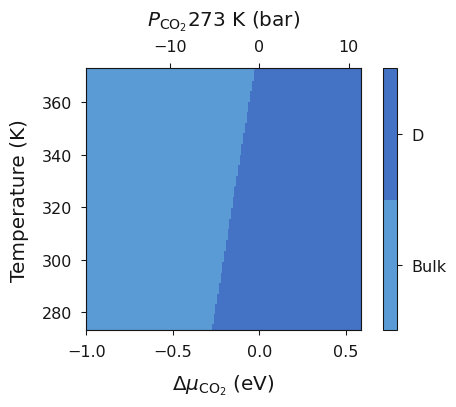

In [8]:
system = bmvt.calculate(data, bulk, deltaX, deltaZ, x_energy, y_energy, mu_y, exp_x, exp_y)
ax = system.plot_mu_vs_t_vs_p(temperature=273, figsize=(5, 4.5))

When investigating the phase diagram for certain systems it could be beneficial to remove a kinetically inhibited but thermodynamically stable phase to investigate the metastable phase diagram.  Within SurfinPy this can be acheived via recreating the data list without the phase in question then recalculating the phse diagram, as below.


In [9]:
data = [Bulk, A, B, C, E, F]

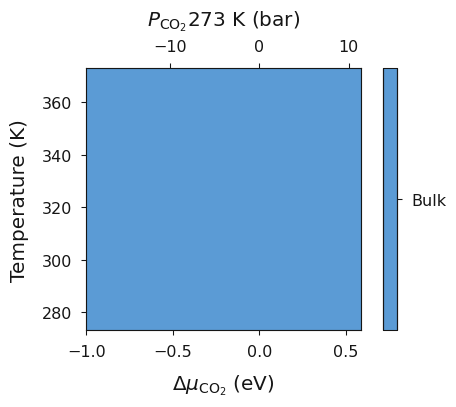

In [10]:
system = bmvt.calculate(data, bulk, deltaX, deltaZ, x_energy, y_energy, mu_y, exp_x, exp_y)
ax = system.plot_mu_vs_t_vs_p(temperature=273, figsize=(5, 4.5))